In [ ]:
!pip install requests tabula-py pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 96.6 MB/s eta 0:00:00


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# **Scraping**

Screaping dei dati dal sito del ministero della giustizia italiano per ricavare le capienze massime mese per mese e per istituto e la capienza attuale.

In [ ]:


# Esempio semplificato per test
urls_by_year = {
    "2019": [
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST168760",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST173677",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST183024",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST188400",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST193650",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST199180",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST206215",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST212437",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST219309",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST225673",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST231374",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST238852"
    ],
    "2020": [
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST245520",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST250612",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST267794",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST271286",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST276692",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST281553",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST285903",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST289764",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST301066",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST301069",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST308223",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST314850"
    ],
    "2021": [
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST319895",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST323234",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST327697",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST331096",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST334403",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST338675",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST342771",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST345758",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST348572",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST352771",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST357666",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST365607"
    ],
    "2022": [
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST365608",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST369465",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST374094",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST377961",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST382391",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST386394",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST390144",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST393944",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST398014",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST401327",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST405710",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST410259"
    ],
    "2023": [
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST414676",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST418777",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST423466",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST426356",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST431165",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST436158",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST439073",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST442883",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST446492",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST447996",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST449508",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST454090"
    ],
    "2024": [
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST459023",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST462936",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST466343",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST1402560",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST1407300",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST1410601",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST1415275",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST1418233",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST1424720",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST1428284",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST1433924",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST1437082"
    ],
    "2025": [
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST1442034",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST1445643",
        "https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST1450708"
    ]
}

months = [
    'Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno',
    'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre'
]

def clean_number(text):
    """Rimuove punti, spazi e gestisce numeri vuoti"""
    return text.replace('.', '').strip() if text.strip() else None

def extract_data(url, date_str):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table')
    if not table:
        print(f"[!] Nessuna tabella in {url}")
        return None

    rows = []
    for tr in table.find_all('tr'):
        cells = [td.get_text(strip=True).replace('\xa0', ' ') for td in tr.find_all(['td', 'th'])]

        if len(cells) >= 6:  # Assicuriamoci di avere abbastanza colonne
            istituto = cells[2]
            capienza = clean_number(cells[4])
            detenuti = clean_number(cells[5])

            # Escludiamo righe non valide
            if istituto and capienza and detenuti and capienza.isdigit() and detenuti.isdigit():
                rows.append({
                    'Istituto': istituto,
                    'Capienza regolamentare': int(capienza),
                    'Detenuti presenti totali': int(detenuti),
                    'Data': date_str
                })

    if not rows:
        print(f"[!] Nessuna riga valida trovata in {url}")
        return None

    return pd.DataFrame(rows)

all_data = []

for year, urls in urls_by_year.items():
    for idx, url in enumerate(urls):
        month = months[idx % 12]
        date_str = f"{month} {year}"
        print(f"Elaborazione: {date_str} - {url}")
        df = extract_data(url, date_str)
        if df is not None:
            all_data.append(df)

if all_data:
    final_df = pd.concat(all_data, ignore_index=True)
    final_df.to_csv('dati_detenuti.csv', index=False)
    print("✅ File CSV creato: dati_detenuti.csv")
else:
    print("❌ Nessun dato estratto.")

Elaborazione: Gennaio 2019 - https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST168760
Elaborazione: Febbraio 2019 - https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST173677
Elaborazione: Marzo 2019 - https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST183024
Elaborazione: Aprile 2019 - https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST188400
Elaborazione: Maggio 2019 - https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST193650
Elaborazione: Giugno 2019 - https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST199180
Elaborazione: Luglio 2019 - https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST206215
Elaborazione: Agosto 2019 - https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST212437
Elaborazione: Settembre 2019 - https://www.giustizia.it/giustizia/it/mg_1_14_1.page?contentId=SST219309
Elaborazione: Ottobre 2019 - https://www.giustizia.it/giustizia/it/mg_1_14_1.page?cont

# **Calcolo sovraffollamento**

Ricavare il sovraffollamento facendo capienza attuale x 100 /capienza massima

In [ ]:
df = pd.read_csv('dati_detenuti.csv')
# Calcolo del sovraffollamento
df['Sovraffollamento (%)'] = (
    df['Detenuti presenti totali'] / df['Capienza regolamentare'] * 100
).round(2)
# Salva il file aggiornato
df.to_csv('dati_detenuti_sovraffollamento.csv', index=False)


# **Pulizia Dataset**

Puliamo il dataset dal punto di vista del nome dell'istituto e per la data perchè poi sarà più facile unirlo con i suicidi mese per mese per ogni istituto

In [ ]:
# Rimuove trattini finali e spazi
df['Istituto'] = df['Istituto'].str.replace(r'\s*-\s*$', '', regex=True).str.strip()

# Mappa per mesi italiani → numerici
mesi = {
    'Gennaio': '01', 'Febbraio': '02', 'Marzo': '03', 'Aprile': '04',
    'Maggio': '05', 'Giugno': '06', 'Luglio': '07', 'Agosto': '08',
    'Settembre': '09', 'Ottobre': '10', 'Novembre': '11', 'Dicembre': '12'
}

# Conversione a datetime
def converti_data(data_str):
    mese, anno = data_str.split()
    return pd.to_datetime(f"{anno}-{mesi[mese]}-01")

df['Data'] = df['Data'].apply(converti_data)
df.to_csv('dati_detenuti_puliti.csv', index=False)

In [ ]:
# Stampa confronto prima e dopo per 5 righe

# Copia temporanea delle colonne originali
df_temp = pd.read_csv('dati_detenuti_sovraffollamento.csv')

# Uniamo le colonne originali con quelle pulite per il confronto
df_confronto = pd.DataFrame({
    'Istituto (originale)': df_temp['Istituto'],
    'Istituto (pulito)': df['Istituto'],
    'Data (originale)': df_temp['Data'],
    'Data (convertita)': df['Data'].dt.strftime('%Y-%m-%d')
})

# Mostra solo le prime 5 righe
print(df_confronto.head(5).to_string(index=False))

Istituto (originale) Istituto (pulito) Data (originale) Data (convertita)
            AVEZZANO          AVEZZANO     Gennaio 2019        2019-01-01
            L'AQUILA          L'AQUILA     Gennaio 2019        2019-01-01
             SULMONA           SULMONA     Gennaio 2019        2019-01-01
              CHIETI            CHIETI     Gennaio 2019        2019-01-01
            LANCIANO          LANCIANO     Gennaio 2019        2019-01-01


# **Unione dataset**

Il passo successivo è associare questo dataset, con la percentuale di sovraffollamento, con il dataset relativo ai suicidi

# **Studio dei dati**

<ipython-input-43-e48be47ad652>:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


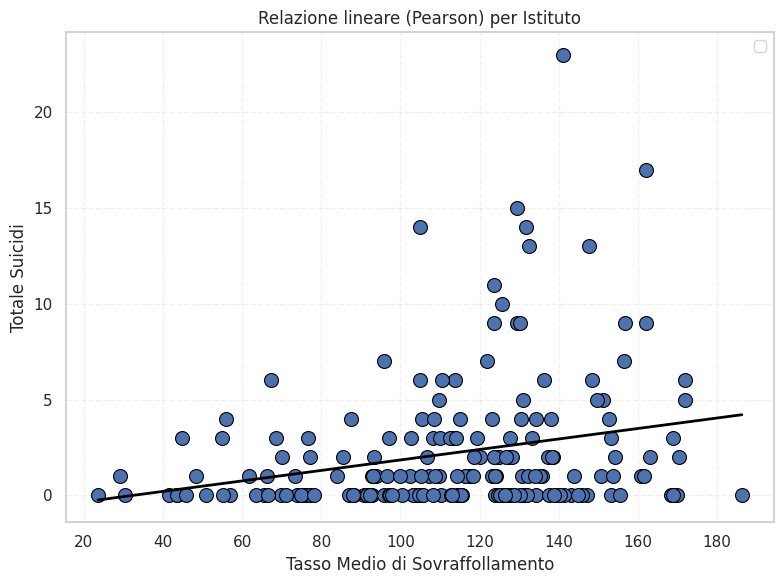

<ipython-input-43-e48be47ad652>:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


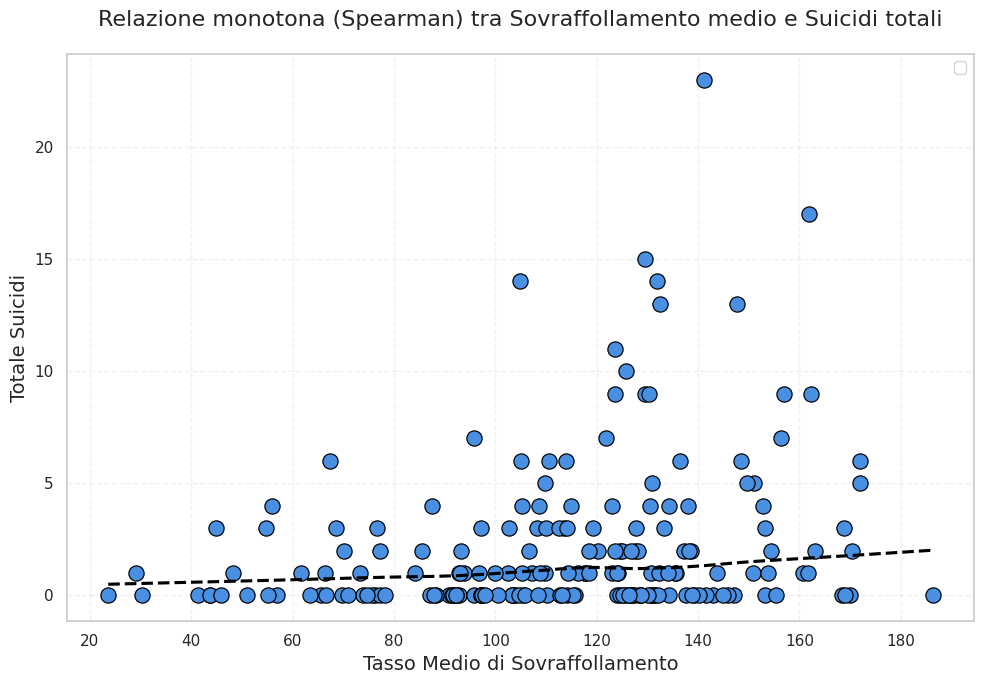


--- Coefficienti di correlazione ---
Pearson  r   : 0.248  (p = 0.00053)
Spearman rho: 0.238  (p = 0.00092)


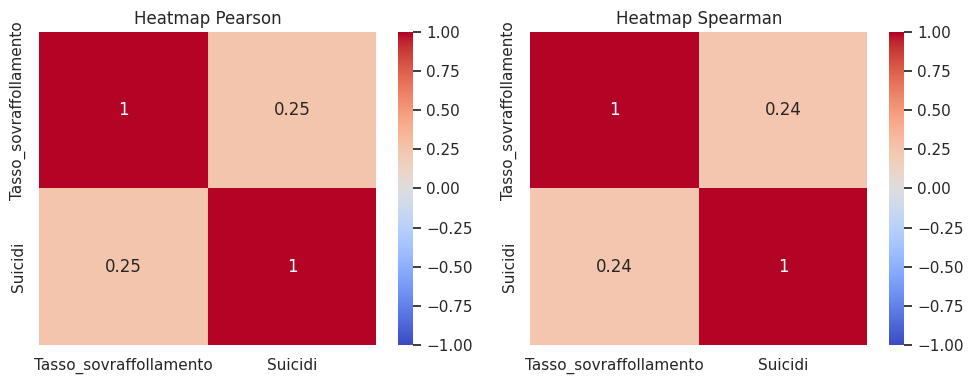

<ipython-input-43-e48be47ad652>:107: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


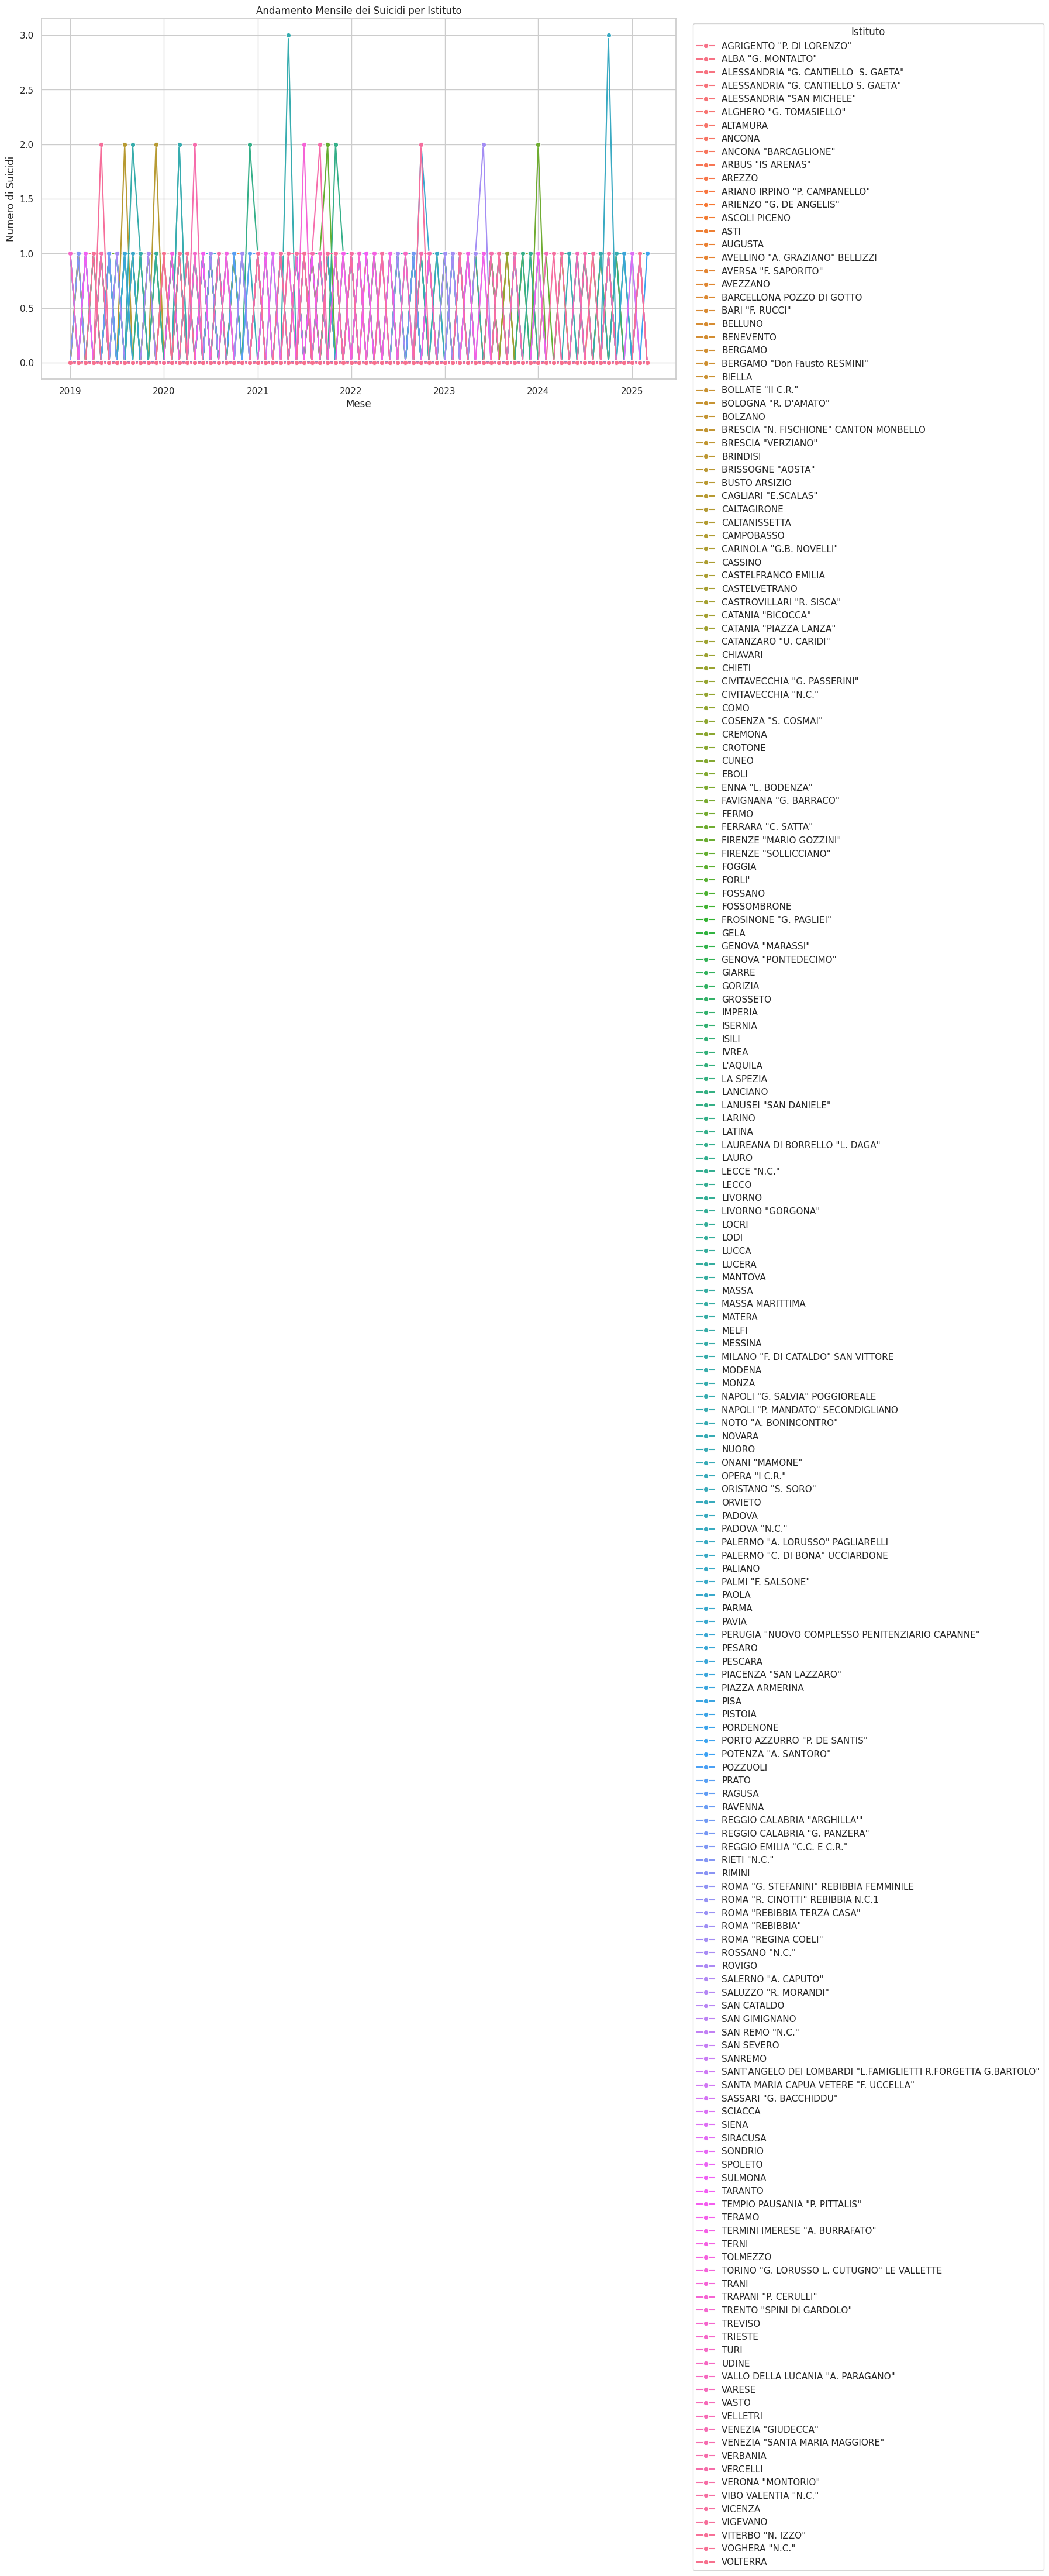

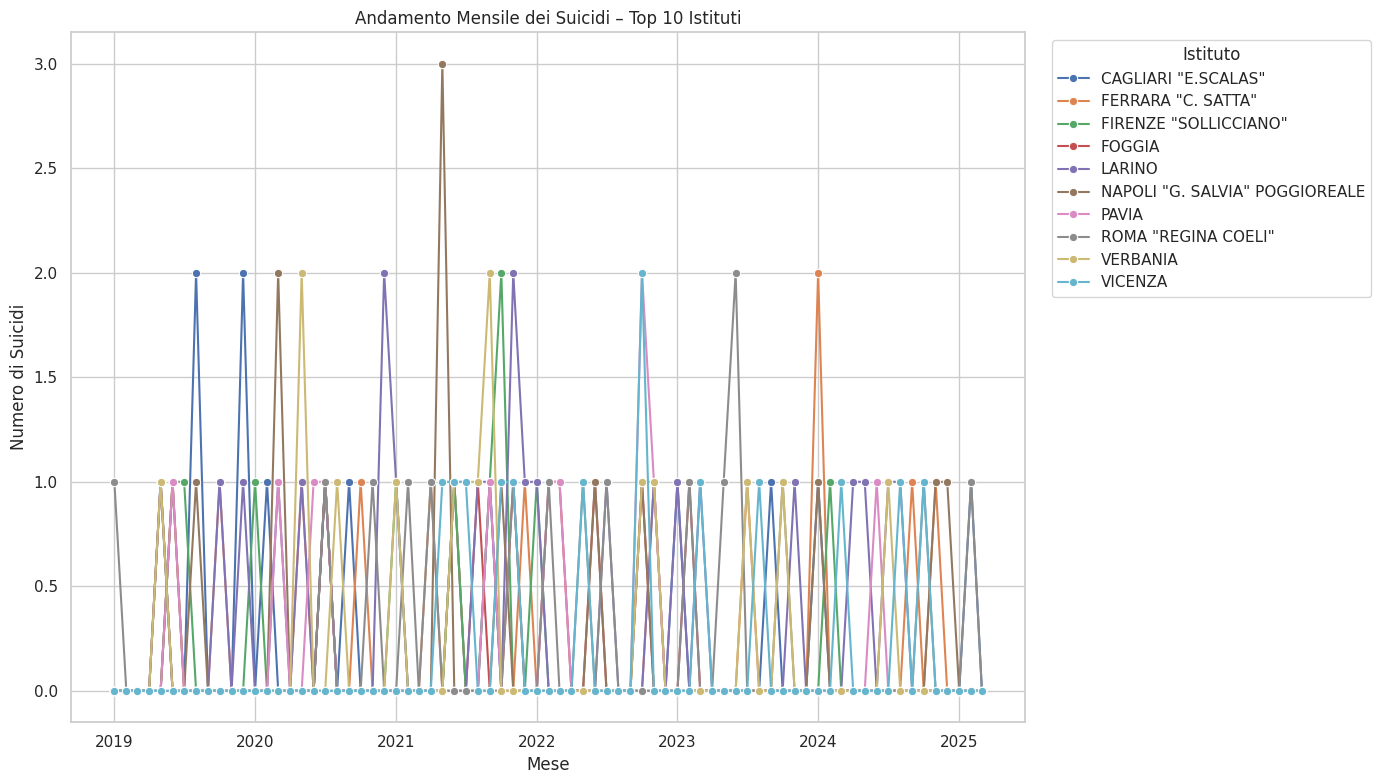

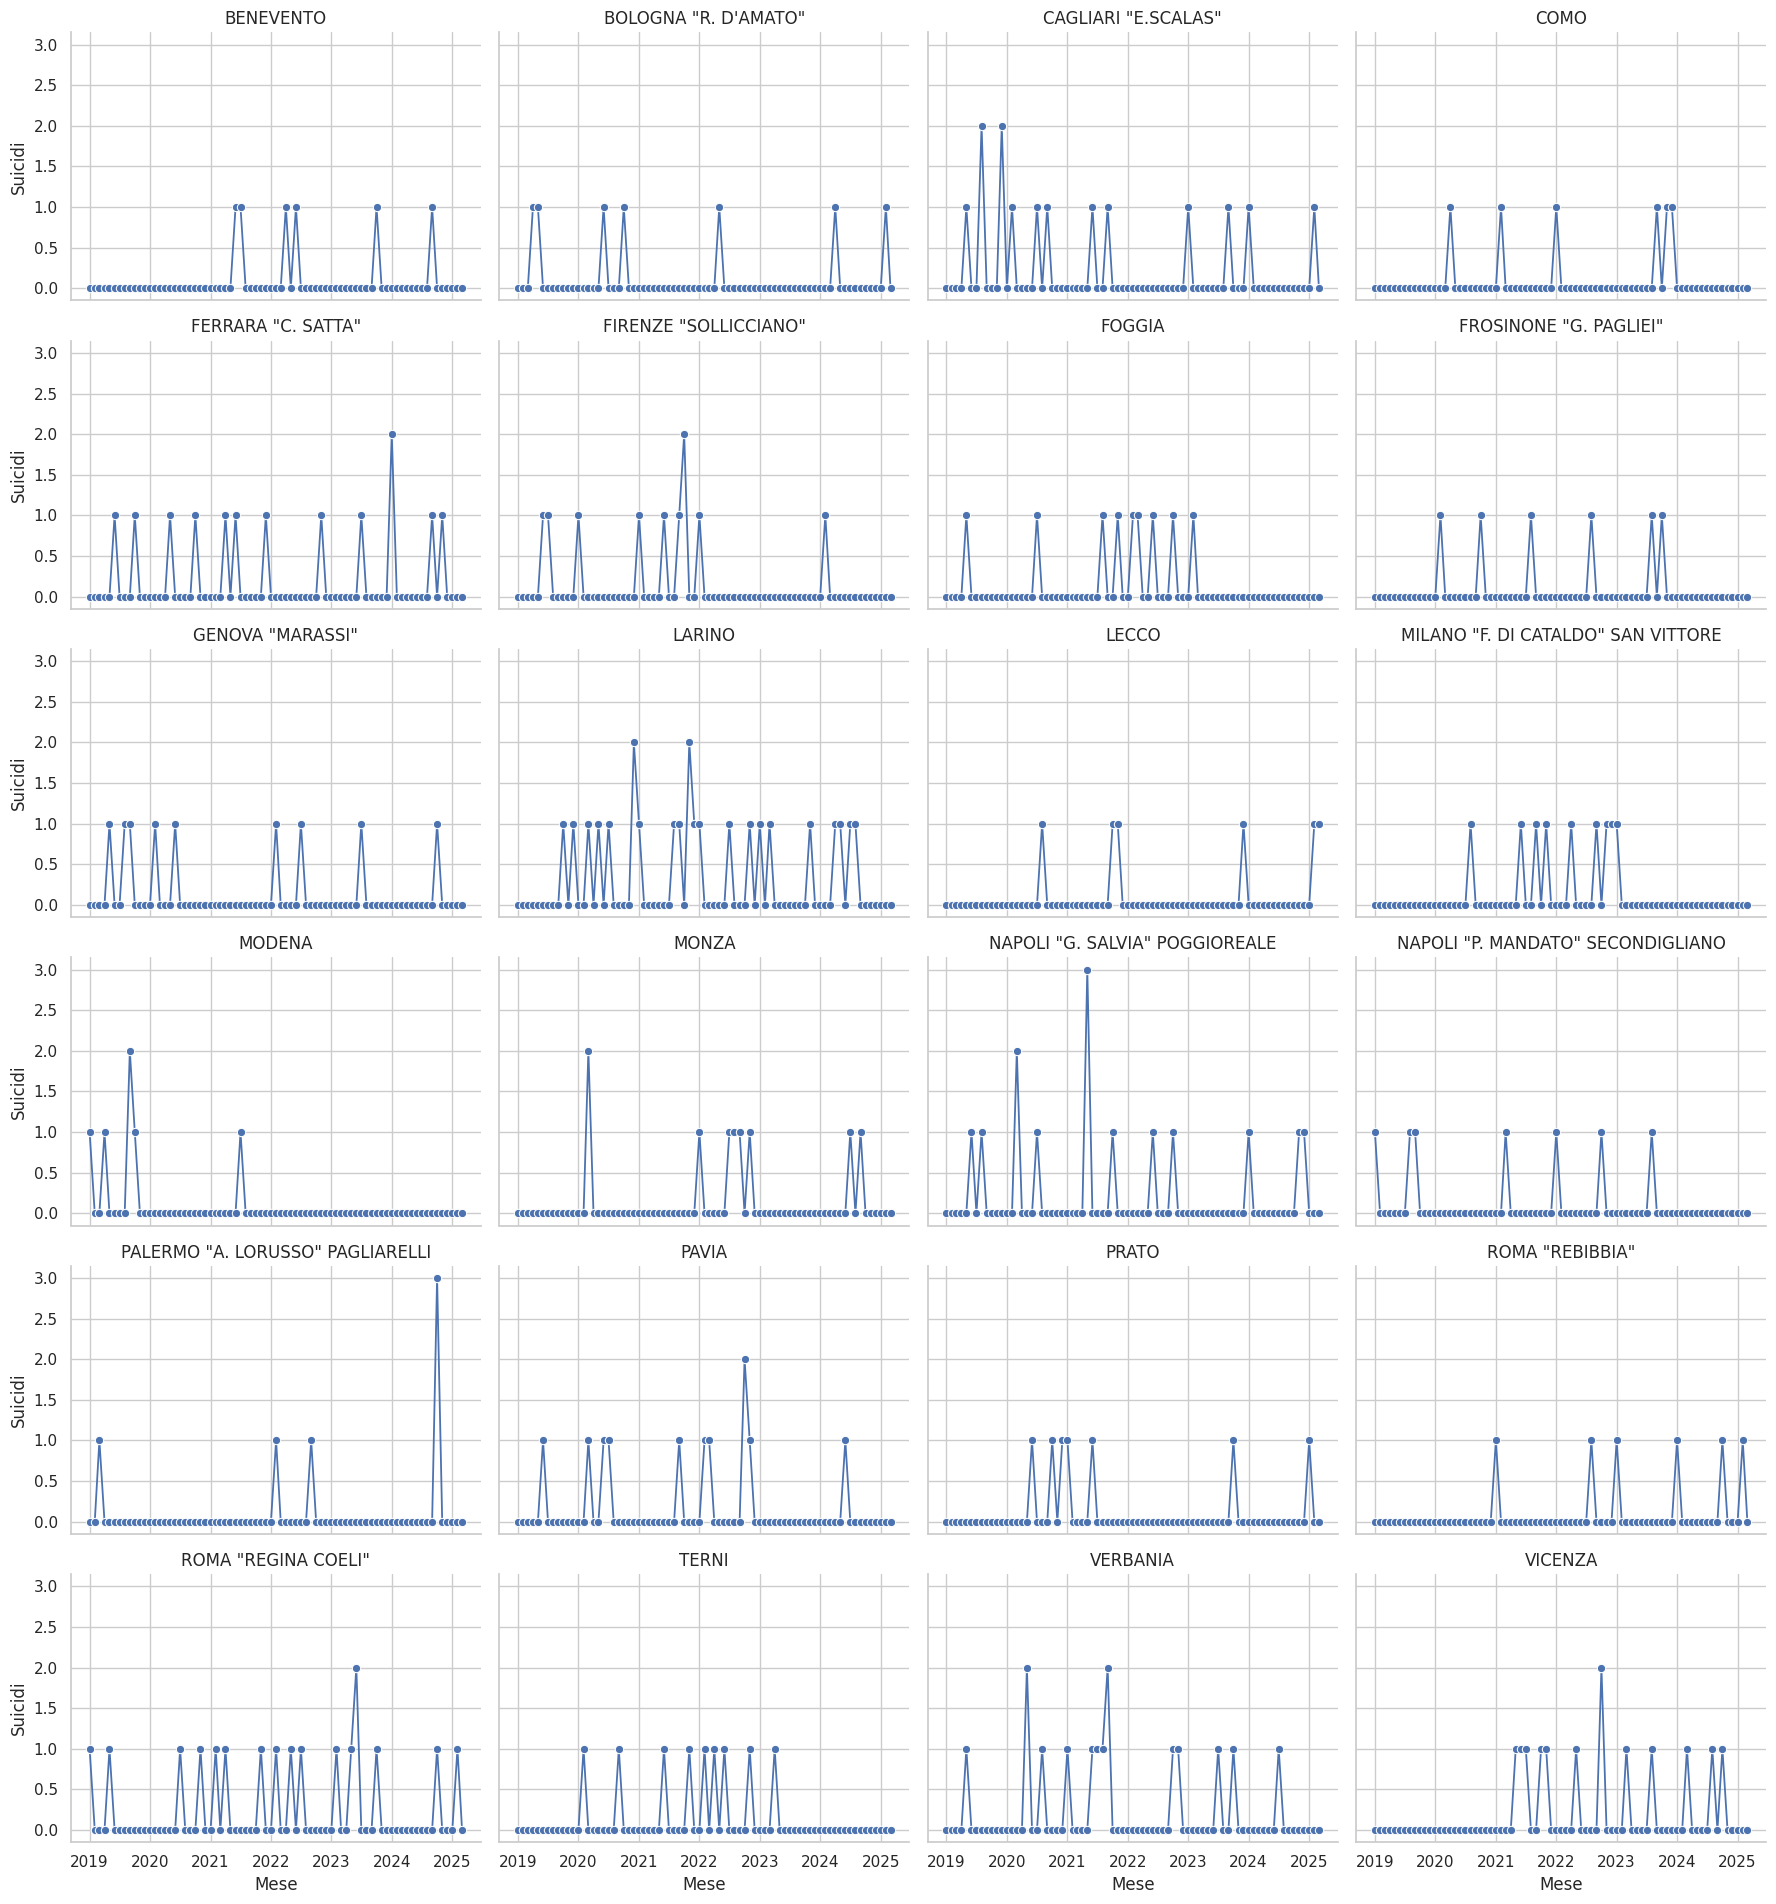

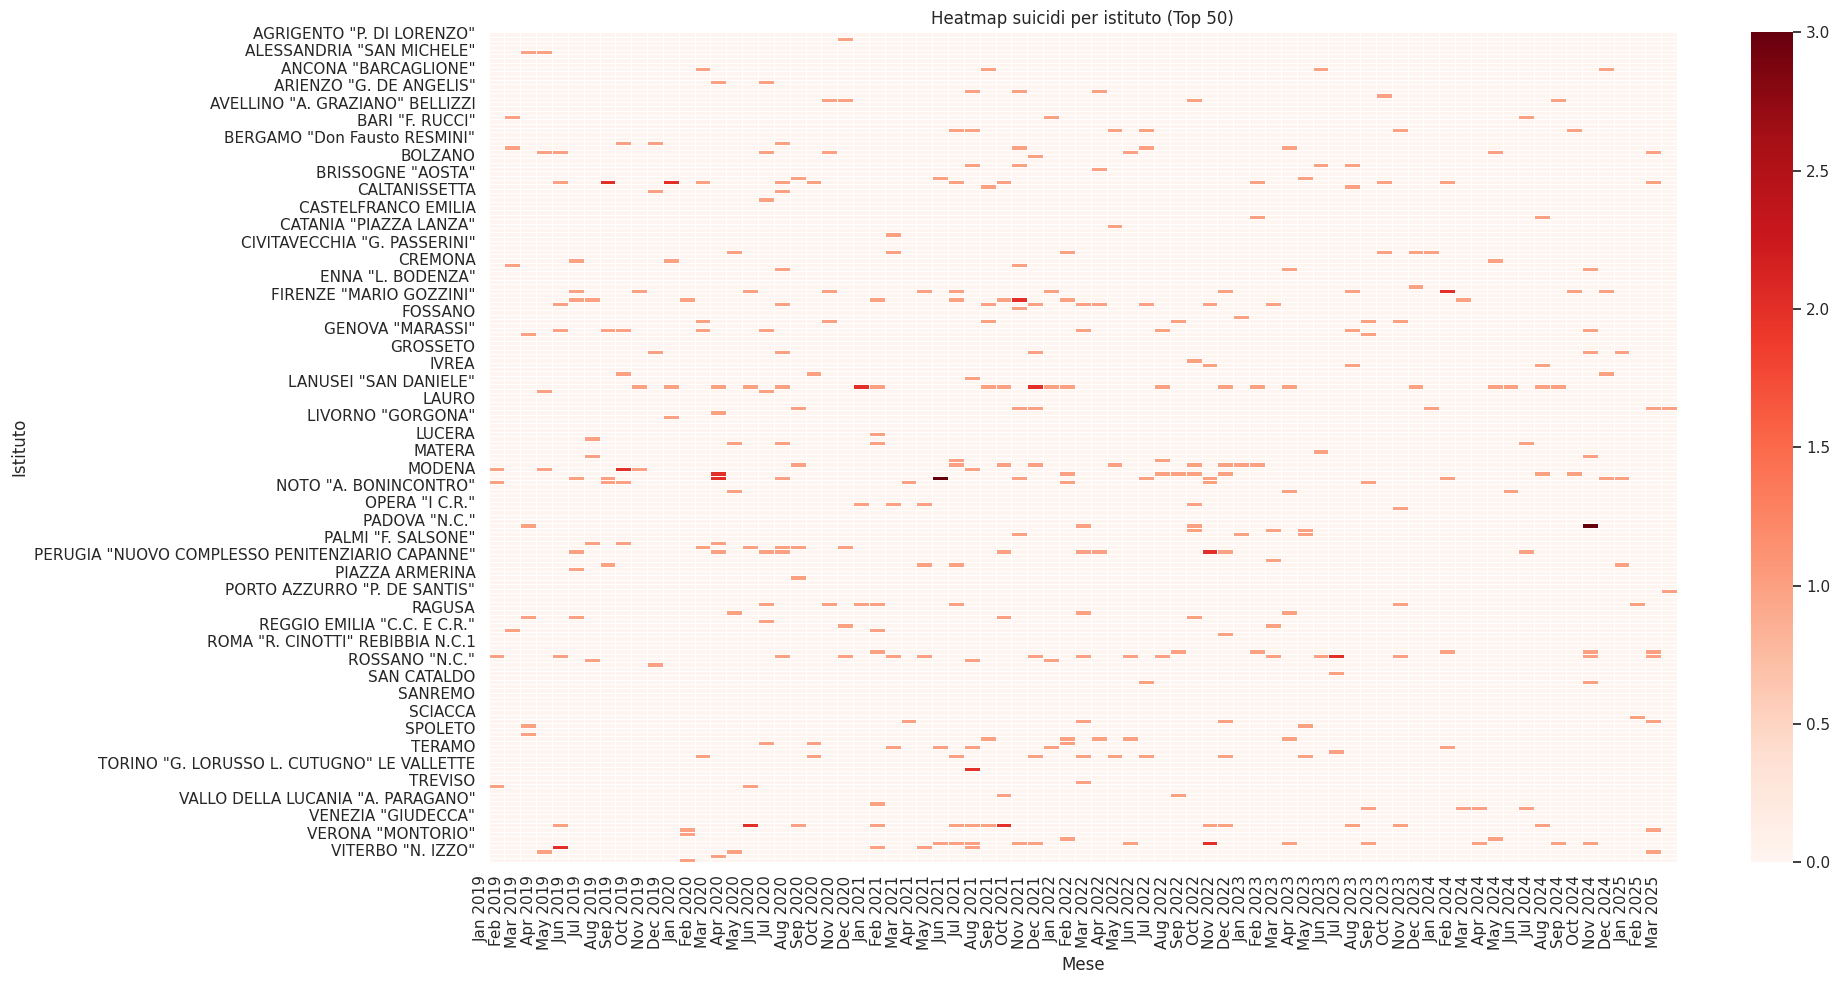

ADF Statistic Suicidi: -6.052919054229219
p-value Suicidi: 1.2649516709023928e-07
ADF Statistic Sovraffollamento: -1.4017260397520097
p-value Sovraffollamento: 0.5814483541953063
ADF Statistic Δsovraffollamento: -5.561650938193911
p-value Δsovraffollamento: 1.536972601438609e-06

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4988  , p=0.4824  , df_denom=70, df_num=1
ssr based chi2 test:   chi2=0.5201  , p=0.4708  , df=1
likelihood ratio test: chi2=0.5183  , p=0.4716  , df=1
parameter F test:         F=0.4988  , p=0.4824  , df_denom=70, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3197  , p=0.2741  , df_denom=67, df_num=2
ssr based chi2 test:   chi2=2.8364  , p=0.2421  , df=2
likelihood ratio test: chi2=2.7820  , p=0.2488  , df=2
parameter F test:         F=1.3197  , p=0.2741  , df_denom=67, df_num=2


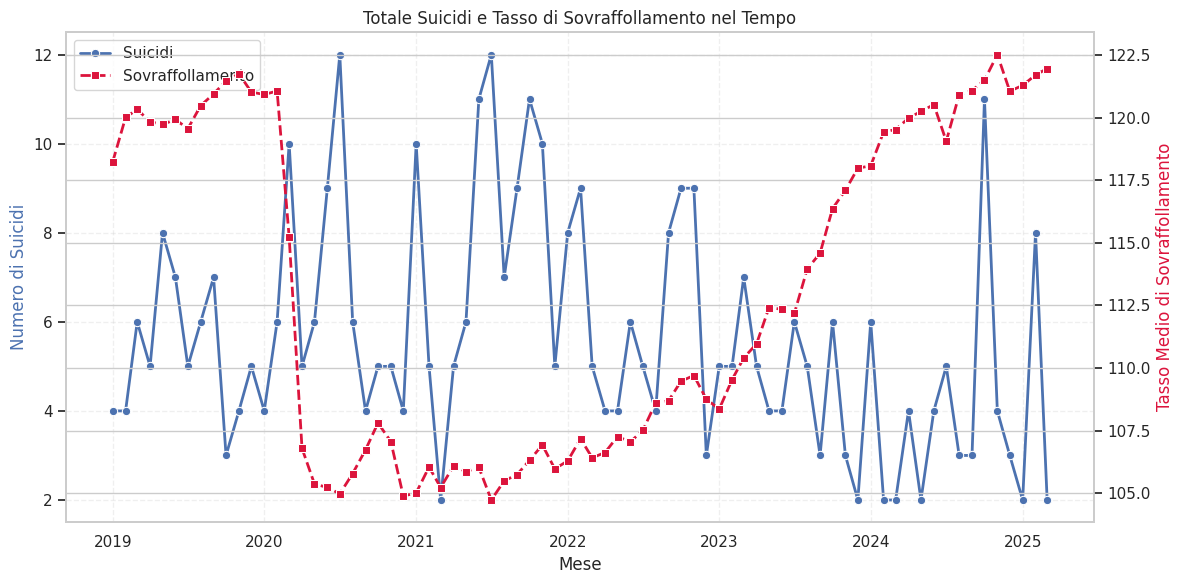


✅ Lettura CSV con separatore ';' e parsing data '%d/%m/%y' completati!


In [ ]:
# Installazione librerie (se necessario in Colab)
!pip install pandas statsmodels scipy matplotlib seaborn

# =============================================================
# IMPORT
# =============================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

sns.set(style="whitegrid")

# =============================================================
# LOAD DATA - separatore ';' e parsing data '%d/%m/%y'
# =============================================================
file_path = 'dataset_mese_x_mese.csv'  # Cambia se necessario

df = pd.read_csv(file_path, sep=';')

# Parsing colonna data
if 'Mese' in df.columns:
    df['Mese'] = pd.to_datetime(df['Mese'], format='%d/%m/%y')

# -------------------------------------------------------------
# RINOMINIAMO COLONNE (adatta se i nomi sono diversi)
# -------------------------------------------------------------
rename_cols = {
    'Istituto': 'Istituto',
    'Mese': 'Mese',
    'Tasso di sovraffollamento': 'Tasso_sovraffollamento',
    'Suicidi': 'Suicidi'
}

df = df[list(rename_cols.keys())].rename(columns=rename_cols)

# =============================================================
# AGGREGAZIONE PER ISTITUTO
# =============================================================
agg = df.groupby('Istituto', as_index=False).agg(
    Tasso_sovraffollamento=('Tasso_sovraffollamento', 'mean'),
    Suicidi=('Suicidi', 'sum')
)

# =============================================================
# 1. SCATTER + REGRESSIONE (PEARSON) con Seaborn
# =============================================================
plt.figure(figsize=(8,6))
ax = sns.scatterplot(data=agg, x='Tasso_sovraffollamento', y='Suicidi', s=100, edgecolor='black')
sns.regplot(data=agg, x='Tasso_sovraffollamento', y='Suicidi', scatter=False, ci=None,
            color='black', line_kws={'linewidth':2, 'label':'Regressione lineare'})
plt.xlabel('Tasso Medio di Sovraffollamento')
plt.ylabel('Totale Suicidi')
plt.title('Relazione lineare (Pearson) per Istituto')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# =============================================================
# 2. SCATTER + LOWESS (SPEARMAN) con Seaborn
# =============================================================
plt.figure(figsize=(10,7))
sns.scatterplot(data=agg, x='Tasso_sovraffollamento', y='Suicidi', s=120, color="#4A90E2", edgecolor='black')
sns.regplot(data=agg, x='Tasso_sovraffollamento', y='Suicidi', scatter=False, lowess=True,
            color='black', line_kws={'linestyle':'--', 'label':'Tendenza LOWESS (Spearman)'})
plt.title('Relazione monotona (Spearman) tra Sovraffollamento medio e Suicidi totali', fontsize=16, pad=20)
plt.xlabel('Tasso Medio di Sovraffollamento', fontsize=14)
plt.ylabel('Totale Suicidi', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# =============================================================
# 3. COEFFICIENTI CORRELAZIONE
# =============================================================
pearson_corr, p_val_pearson   = pearsonr(agg['Tasso_sovraffollamento'], agg['Suicidi'])
spearman_corr, p_val_spearman = spearmanr(agg['Tasso_sovraffollamento'], agg['Suicidi'])
print("\n--- Coefficienti di correlazione ---")
print(f"Pearson  r   : {pearson_corr:.3f}  (p = {p_val_pearson:.5f})")
print(f"Spearman rho: {spearman_corr:.3f}  (p = {p_val_spearman:.5f})")



# =============================================================
# 5. ANDAMENTO MENSILE SUICIDI PER ISTITUTO
# =============================================================
serie = df.groupby(['Istituto','Mese'], as_index=False)['Suicidi'].sum()
plt.figure(figsize=(14,8))
sns.lineplot(data=serie, x='Mese', y='Suicidi', hue='Istituto', marker='o')
plt.title('Andamento Mensile dei Suicidi per Istituto')
plt.xlabel('Mese')
plt.ylabel('Numero di Suicidi')
plt.legend(title='Istituto', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# =============================================================
# 5A. ANDAMENTO MENSILE – SOLO ISTITUTI CON PIÙ SUICIDI
# =============================================================
# 1. Trovo i 10 con più suicidi nel periodo
topN = (df.groupby('Istituto')['Suicidi']
          .sum()
          .nlargest(10)          # cambia 10 a piacere
          .index)

# 2. Filtro la serie originale
serie_top = serie[serie['Istituto'].isin(topN)]

plt.figure(figsize=(14,8))
sns.lineplot(data=serie_top, x='Mese', y='Suicidi',
             hue='Istituto', marker='o')
plt.title('Andamento Mensile dei Suicidi – Top 10 Istituti')
plt.xlabel('Mese')
plt.ylabel('Numero di Suicidi')
plt.legend(title='Istituto', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# =============================================================
# 5B. FACET GRID (piccoli multipli)
# =============================================================
# (puoi filtrare prima a un sotto‐insieme per non produrre 200 grafici)
max_facets = 24       # quanti mini‐grafici vuoi mostrare?
top_facets = (df.groupby('Istituto')['Suicidi']
                .sum()
                .nlargest(max_facets)
                .index)

serie_small = serie[serie['Istituto'].isin(top_facets)]

g = sns.relplot(data=serie_small, x='Mese', y='Suicidi',
                kind='line', col='Istituto', col_wrap=4,
                height=3.2, aspect=1.4, marker='o', linewidth=1.3)
g.set_titles('{col_name}')
g.set_axis_labels('Mese', 'Suicidi')
g.fig.tight_layout()
plt.show()

# =============================================================
# HEATMAP SUICIDI PER ISTITUTO – TOP 30 (mese-anno)  ✅ versione corretta
# =============================================================
#vorrei vedere tutte le etichette delgli istituti raggruppate, con unique
#print(len(df['Istituto'].unique()))
#print(df['Istituto'].unique())



df_grouped = df.groupby(["Mese", "Istituto"]).agg({
    "Suicidi": "sum",
    "Tasso_sovraffollamento": "mean"
}).reset_index()
import numpy as np                      #  ← aggiungi questo import
import matplotlib.pyplot as plt
import seaborn as sns

df_grouped['MeseYM'] = df['Mese'].dt.to_period('M').dt.to_timestamp()

heatmap_df = df_grouped.pivot(index="Istituto", columns="Mese", values="Suicidi").fillna(0)


# Mostra solo i primi 30 istituti con più suicidi
top_heatmap_df = heatmap_df

plt.figure(figsize=(20, 10))
ax = sns.heatmap(top_heatmap_df, cmap='Reds', linewidths=0.5)

ax.set_title('Heatmap suicidi per istituto (Top 50)')
ax.set_xlabel('Mese')
ax.set_ylabel('Istituto')
# 5. etichette X: mese-anno (no giorno, no 00:00:00)
ax.set_xticks(np.arange(len(top_heatmap_df.columns)))
ax.set_xticklabels([d.strftime('%b %Y') for d in top_heatmap_df.columns],
                   rotation=90, ha='right')
plt.tight_layout()
plt.show()

# =============================================================
# 6. TREND GLOBALE SUICIDI + SOVRAFFOLLAMENTO
# =============================================================
trend = df.groupby('Mese', as_index=False).agg(
    Suicidi=('Suicidi', 'sum'),
    Tasso_sovraffollamento=('Tasso_sovraffollamento', 'mean')   # media mensile
)

# Assumiamo df abbia colonne ['suicidi', 'sovraffollamento']
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller

result = adfuller(trend['Suicidi'])
print('ADF Statistic Suicidi:', result[0])
print('p-value Suicidi:', result[1])
result = adfuller(trend['Tasso_sovraffollamento'])
print('ADF Statistic Sovraffollamento:', result[0])
print('p-value Sovraffollamento:', result[1])
trend['Δsovraffollamento'] = trend['Tasso_sovraffollamento'].diff()
# 2. Elimina le righe con NaN o inf
df_clean = trend[['Suicidi', 'Δsovraffollamento']].dropna()

result = adfuller(df_clean['Δsovraffollamento'])
print('ADF Statistic Δsovraffollamento:', result[0])
print('p-value Δsovraffollamento:', result[1])

grangercausalitytests(df_clean[['Suicidi', 'Δsovraffollamento']], maxlag=2)


fig, ax1 = plt.subplots(figsize=(12,6))

# linea suicidi (asse sinistro)
h_suicidi = sns.lineplot(
    data=trend, x='Mese', y='Suicidi',
    marker='o', ax=ax1, lw=2, label='Suicidi'           # ← una sola voce in legenda
).lines[0]

ax1.set_xlabel('Mese')
ax1.set_ylabel('Numero di Suicidi', color=h_suicidi.get_color())
ax1.grid(True, linestyle='--', alpha=0.3)

# linea sovraffollamento (asse destro) – colore diverso
ax2 = ax1.twinx()
h_sovraff = sns.lineplot(
    data=trend, x='Mese', y='Tasso_sovraffollamento',
    marker='s', ax=ax2, lw=2, linestyle='--', color='crimson',
    legend=False                                       # ← nessuna voce duplicata
).lines[0]

ax2.set_ylabel('Tasso Medio di Sovraffollamento', color='crimson')

# legenda “pulita”
ax1.legend([h_suicidi, h_sovraff], ['Suicidi', 'Sovraffollamento'], loc='upper left')

plt.title('Totale Suicidi e Tasso di Sovraffollamento nel Tempo')
plt.tight_layout()
plt.show()



# **Altro studio**

La nuova idea è quella di capire se c'è una correlazione effettiva tra i dati della vivibilità delle carceri (comprendendo tutte le necessità di sicurezza e igene) e i suicidi.

Osservazioni utilizzate: 810  |  Predittori: 141

================ OLS con effetti fissi (istituto) ================
                            OLS Regression Results                            
Dep. Variable:                suicidi   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     3.110
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           7.75e-22
Time:                        16:21:37   Log-Likelihood:                -743.23
No. Observations:                 810   AIC:                             1756.
Df Residuals:                     675   BIC:                             2391.
Df Model:                         134                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: invalid value encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


All NB approaches failed. Consider Poisson regression as alternative.
================ Poisson GLM with fixed effects (fallback) ================
                 Generalized Linear Model Regression Results                  
Dep. Variable:                suicidi   No. Observations:                  810
Model:                            GLM   Df Residuals:                      675
Model Family:                 Poisson   Df Model:                          134
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:           -1.2620e+112
Date:                Sun, 27 Apr 2025   Deviance:                  2.5240e+112
Time:                        16:21:41   Pearson chi2:                1.26e+112
No. Iterations:                   100   Pseudo R-squ. (CS):               -inf
Covariance Type:            nonrobust                                         
                                             coef    std err    

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1891: RuntimeWarning: overflow encountered in exp
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


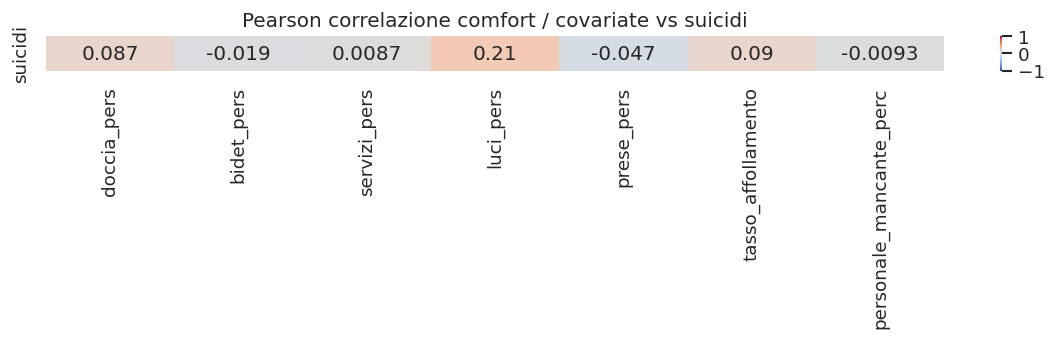


✅ Notebook eseguito: OLS e Negative Binomial con effetti fissi, VIF e heatmap pronti!


In [ ]:
# =============================================================
# NOTEBOOK – comfort (bagni/docce/prese…) vs suicidi 2019‑2024
# OLS + Negative Binomial (effetti fissi per istituto)
# =============================================================

# ------------------- LIBRERIE -------------------
!pip install pandas seaborn statsmodels scikit-learn scipy -q
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid", rc={"figure.dpi":120})

# ------------------- 1. CARICA DATASET -------------------
file_path = 'data.csv'
raw_df = pd.read_csv(file_path)

# ------------------- 2. LONG FORMAT -------------------
comfort_cols = ['doccia_pers','bidet_pers','servizi_pers','luci_pers','prese_pers']
extra_cov    = ['tasso_affollamento','personale_mancante_perc']
suicide_cols = [c for c in raw_df.columns if c.startswith('suicidi_') and 'totali' not in c]

long_df = raw_df.melt(id_vars=['istituto'] + extra_cov + comfort_cols,
                      value_vars=suicide_cols,
                      var_name='anno', value_name='suicidi')
long_df['anno'] = long_df['anno'].str.replace('suicidi_','').astype(int)
long_df = long_df[long_df['anno'].between(2019,2024)].copy()

# ------------------- 3. PULIZIA -------------------
long_df.replace([np.inf,-np.inf], np.nan, inplace=True)
long_df.dropna(subset=comfort_cols + extra_cov + ['suicidi'], inplace=True)
long_df.reset_index(drop=True, inplace=True)

# ------------------- 4. EFFETTI FISSI & STANDARDIZZAZIONE -------------------
inst_dummies = pd.get_dummies(long_df['istituto'], drop_first=True, prefix='inst')

scale_cols = comfort_cols + extra_cov
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(long_df[scale_cols]), columns=scale_cols)

# Design matrix completa
X_full = pd.concat([X_scaled, inst_dummies], axis=1)
X_full = sm.add_constant(X_full)

y = long_df['suicidi']

# ---------- Cast numerico & drop non-finiti ----------
X_full = X_full.apply(pd.to_numeric, errors='coerce').astype(float)
y      = pd.to_numeric(y, errors='coerce').astype(float)
mask   = np.isfinite(X_full).all(axis=1) & np.isfinite(y)
X_mod  = X_full[mask]
y_mod  = y[mask]

# ---------- Elimina colonne costanti (varianza 0) ----------
X_mod = X_mod.loc[:, X_mod.var() > 0]

print(f"Osservazioni utilizzate: {len(y_mod)}  |  Predittori: {X_mod.shape[1]}")

# ------------------- 5. OLS con effetti fissi -------------------
ols_fe = sm.OLS(y_mod, X_mod).fit()
print("\n================ OLS con effetti fissi (istituto) ================")
print(ols_fe.summary())

# Make sure y is integer-valued for count models (no epsilon needed)
y_nb = np.round(y_mod).astype(int)

# Use the dedicated NegativeBinomial class instead of GLM
try:
    nb_fe = NegativeBinomial(y_nb, X_mod).fit(disp=0)
    print("================ Negative Binomial with fixed effects ================")
    print(nb_fe.summary())
except Exception as e:
    print(f"First NB approach failed: {str(e)}")

    # Alternative: Try with explicit starting values and different optimizer
    try:
        nb_fe = NegativeBinomial(y_nb, X_mod).fit(
            start_params=[0.01] * X_mod.shape[1],
            method='powell',
            disp=0
        )
        print("================ Negative Binomial with fixed effects (alternative optimizer) ================")
        print(nb_fe.summary())
    except Exception as e:
        print(f"Second NB approach failed: {str(e)}")

        # Last resort: Try using statsmodels GLM with different alpha
        try:
            # Try a different alpha value that might be more stable
            nb_fe = sm.GLM(
                y_nb,
                X_mod,
                family=sm.families.NegativeBinomial(alpha=0.5),
                missing='drop'
            ).fit()
            print("================ Negative Binomial GLM with different alpha ================")
            print(nb_fe.summary())
        except Exception as e:
            print(f"All NB approaches failed. Consider Poisson regression as alternative.")

            # Fallback to Poisson if all else fails
            poisson_fe = sm.GLM(
                y_nb,
                X_mod,
                family=sm.families.Poisson(),
                missing='drop'
            ).fit()
            print("================ Poisson GLM with fixed effects (fallback) ================")
            print(poisson_fe.summary())

# ------------------- 7. VIF predittori continui ------------------- VIF predittori continui -------------------
vif_df = pd.DataFrame({
    'variable': X_scaled.columns,
    'VIF': [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
})
print("\nVIF (comfort + covariate continue):\n", vif_df)

# ------------------- 8. HEATMAP PEARSON comfort/covariate vs suicidi -------------------
features = comfort_cols + extra_cov + ['suicidi']
pear = long_df[features].corr(method='pearson')
plt.figure(figsize=(10,3))
ax = sns.heatmap(pear.loc[comfort_cols + extra_cov, 'suicidi']
                .to_frame().T, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
ax.set_title('Pearson correlazione comfort / covariate vs suicidi')
plt.tight_layout()
plt.show()




/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
<ipython-input-39-0e830d43b522>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hygiene_tertile', y='suicidi', data=panel,



================ NB GLM (cluster SE per istituto) ================
                 Generalized Linear Model Regression Results                  
Dep. Variable:                suicidi   No. Observations:                  810
Model:                            GLM   Df Residuals:                      801
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -628.78
Date:                Sun, 27 Apr 2025   Deviance:                       614.68
Time:                        16:33:15   Pearson chi2:                     879.
No. Iterations:                     6   Pseudo R-squ. (CS):            0.04260
Covariance Type:              cluster                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

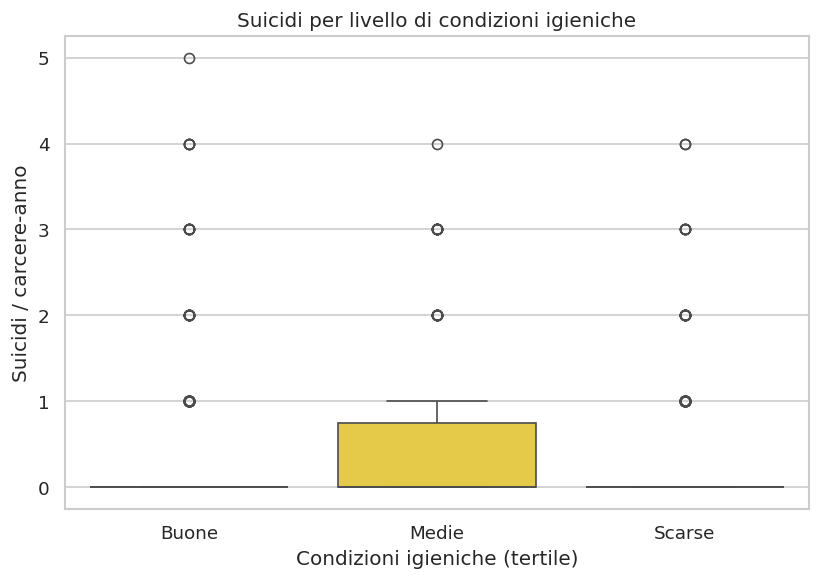

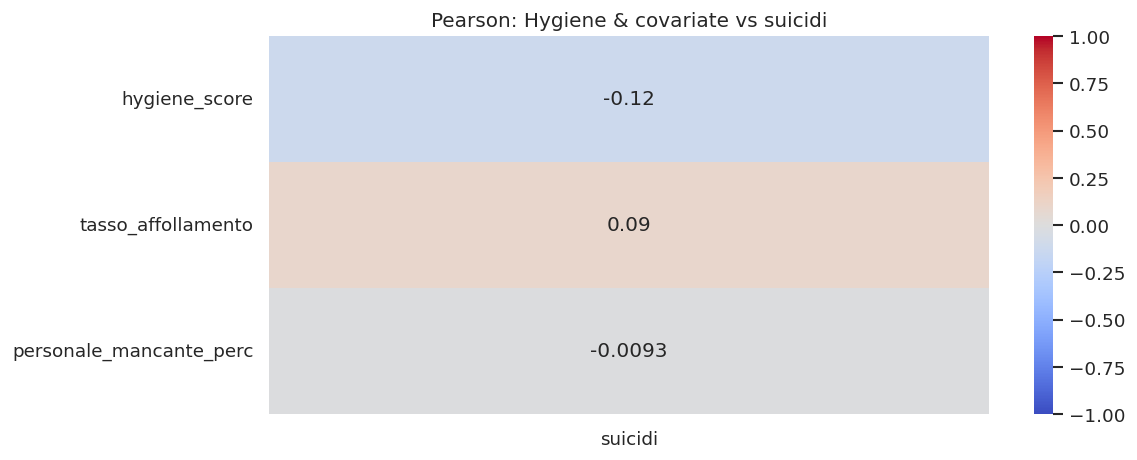


✅ Analisi indice igienico completata!


In [ ]:
# =============================================================
# Hygiene Score vs Suicidi 2019‑2024 – codice definitivo
# =============================================================
# 1. Calcola indice igienico (media z‑score comfort per detenuto)
# 2. Crea tertili Buone / Medie / Scarse
# 3. Negative Binomial GLM con SE clusterizzati per istituto
# 4. Box‑plot suicidi per tertile + heatmap Pearson
# -------------------------------------------------------------

# ------------------- LIBRERIE -------------------
!pip install pandas seaborn statsmodels scikit-learn scipy -q
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.genmod.families import NegativeBinomial
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid", rc={"figure.dpi":120})

# ------------------- 1. CARICA E PREPARA DATA -------------------
path = 'data.csv'
raw = pd.read_csv(path)

comfort = ['doccia_pers','bidet_pers','servizi_pers','luci_pers','prese_pers']
covariate = ['tasso_affollamento','personale_mancante_perc']
suic_cols = [c for c in raw.columns if c.startswith('suicidi_') and 'totali' not in c]

panel = raw.melt(id_vars=['istituto']+covariate+comfort,
                 value_vars=suic_cols,
                 var_name='anno', value_name='suicidi')
panel['anno'] = panel['anno'].str.replace('suicidi_','').astype(int)
panel = panel[panel['anno'].between(2019,2024)].copy()

# Pulisci
panel.replace([np.inf,-np.inf], np.nan, inplace=True)
panel.dropna(subset=comfort+covariate+['suicidi'], inplace=True)
panel.reset_index(drop=True, inplace=True)

# ------------------- 2. HYGiene SCORE & TERTILI -------------------
Z = StandardScaler().fit_transform(panel[comfort])
panel['hygiene_score'] = -Z.mean(axis=1)   # peggio -> valori alti
panel['hygiene_tertile'] = pd.qcut(panel['hygiene_score'], 3,
                                   labels=['Buone','Medie','Scarse'])

# ------------------- 3. NEGATIVE BINOMIAL GLM (cluster SE) --------
formula = "suicidi ~ hygiene_score + tasso_affollamento + personale_mancante_perc + C(anno)"
nb = smf.glm(formula=formula,
             data=panel,
             family=NegativeBinomial())
nb_res = nb.fit(cov_type='cluster', cov_kwds={'groups': panel['istituto']})

print("\n================ NB GLM (cluster SE per istituto) ================")
print(nb_res.summary())

# ------------------- 4. BOX‑PLOT SUICIDI PER TERTILE --------------
plt.figure(figsize=(7,5))
sns.boxplot(x='hygiene_tertile', y='suicidi', data=panel,
            order=['Buone','Medie','Scarse'],
            palette=['#7fc97f','#ffd92f','#e31a1c'])
plt.xlabel('Condizioni igieniche (tertile)')
plt.ylabel('Suicidi / carcere‑anno')
plt.title('Suicidi per livello di condizioni igieniche')
plt.tight_layout()
plt.show()

# ------------------- 5. HEATMAP PEARSON ---------------------------
features = comfort + covariate + ['hygiene_score','suicidi']
plt.figure(figsize=(10,4))
ax = sns.heatmap(panel[features].corr().loc[['hygiene_score']+covariate, ['suicidi']],
                 annot=True, cmap='coolwarm', vmin=-1, vmax=1)
ax.set_title('Pearson: Hygiene & covariate vs suicidi')
plt.tight_layout()
plt.show()

print("\n✅ Analisi indice igienico completata!")


# Studio per UK e Francia

In [ ]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

df_UK = pd.read_excel('UK.xlsx')
pearson_corr_UK, p_val_pearson_UK   = pearsonr(df_UK['sovraffollamento_uk'], df_UK['suicidi_uk'])
spearman_corr_UK, p_val_spearman_UK = spearmanr(df_UK['sovraffollamento_uk'], df_UK['suicidi_uk'])
print("\n--- Coefficienti di correlazione ---")
print(f"Pearson  r   : {pearson_corr_UK:.3f}  (p = {p_val_pearson:.5f})")
print(f"Spearman rho: {spearman_corr_UK:.3f}  (p = {p_val_spearman_UK:.5f})")


--- Coefficienti di correlazione ---
Pearson  r   : 0.253  (p = 0.07313)
Spearman rho: 0.191  (p = 0.51297)


In [ ]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

df_FR = pd.read_excel('dati_fr.xlsx')
pearson_corr_FR, p_val_pearson_FR   = pearsonr(df_FR['sovraffollamento'], df_FR['suicidi'])
spearman_corr_FR, p_val_spearman_FR = spearmanr(df_FR['sovraffollamento'], df_FR['suicidi'])
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_FR['suicidi'])
print('ADF Statistic Suicidi:', result[0])
print('p-value Suicidi:', result[1])
result = adfuller(df_FR['sovraffollamento'])
print('ADF Statistic Sovraffollamento:', result[0])
print('p-value Sovraffollamento:', result[1])
trend['Δsuicidi'] = df_FR['suicidi'].diff()
trend['sovraffollamento']= df_FR['sovraffollamento']
# 2. Elimina le righe con NaN o inf
df_clean = trend[['Δsuicidi', 'sovraffollamento']].dropna()

result = adfuller(df_clean['Δsuicidi'])
print('ADF Statistic Δsuicidi:', result[0])
print('p-value Δsuicidi:', result[1])

grangercausalitytests(df_clean[['Δsuicidi', 'sovraffollamento']], maxlag=2)


print("\n--- Coefficienti di correlazione ---")
print(f"Pearson  r   : {pearson_corr_FR:.3f}  (p = {p_val_pearson_FR:.5f})")
print(f"Spearman rho: {spearman_corr_FR:.3f}  (p = {p_val_spearman_FR:.5f})")

ADF Statistic Suicidi: -1.6317344275073404
p-value Suicidi: 0.4665829754398109
ADF Statistic Sovraffollamento: -7.3596739629748695
p-value Sovraffollamento: 9.573614079589449e-11
ADF Statistic Δsuicidi: -2.899506743620062
p-value Δsuicidi: 0.04540538655166259

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0413  , p=0.8470  , df_denom=5, df_num=1
ssr based chi2 test:   chi2=0.0661  , p=0.7972  , df=1
likelihood ratio test: chi2=0.0658  , p=0.7976  , df=1
parameter F test:         F=0.0413  , p=0.8470  , df_denom=5, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0122  , p=0.9879  , df_denom=2, df_num=2
ssr based chi2 test:   chi2=0.0854  , p=0.9582  , df=2
likelihood ratio test: chi2=0.0849  , p=0.9584  , df=2
parameter F test:         F=0.0122  , p=0.9879  , df_denom=2, df_num=2

--- Coefficienti di correlazione ---
Pearson  r   : 0.589  (p = 0.07313)
Spearman rho: 0.783  (p = 0.00741)


ADF Statistic Suicidi: -0.49836229087955497
p-value Suicidi: 0.8923356885302998
ADF Statistic Sovraffollamento: -3.1271843297245034
p-value Sovraffollamento: 0.02460574754789809
ADF Statistic Δsuicidi: -2.2807601485407885
p-value Δsuicidi: 0.17824830523930374

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0214  , p=0.8870  , df_denom=9, df_num=1
ssr based chi2 test:   chi2=0.0285  , p=0.8659  , df=1
likelihood ratio test: chi2=0.0285  , p=0.8660  , df=1
parameter F test:         F=0.0214  , p=0.8870  , df_denom=9, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6069  , p=0.5754  , df_denom=6, df_num=2
ssr based chi2 test:   chi2=2.2252  , p=0.3287  , df=2
likelihood ratio test: chi2=2.0265  , p=0.3630  , df=2
parameter F test:         F=0.6069  , p=0.5754  , df_denom=6, df_num=2


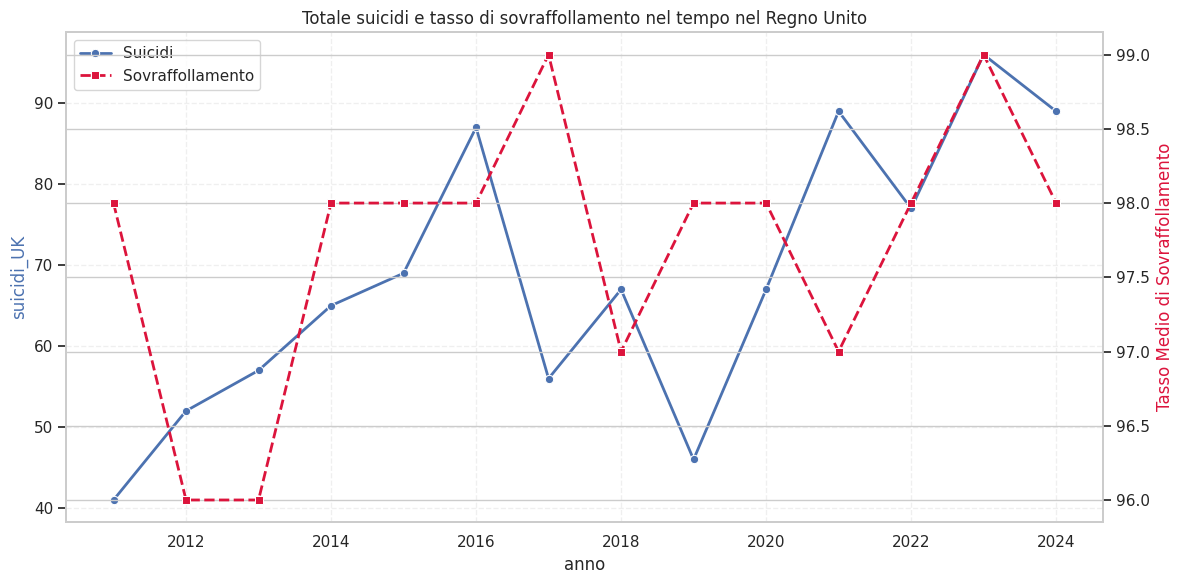

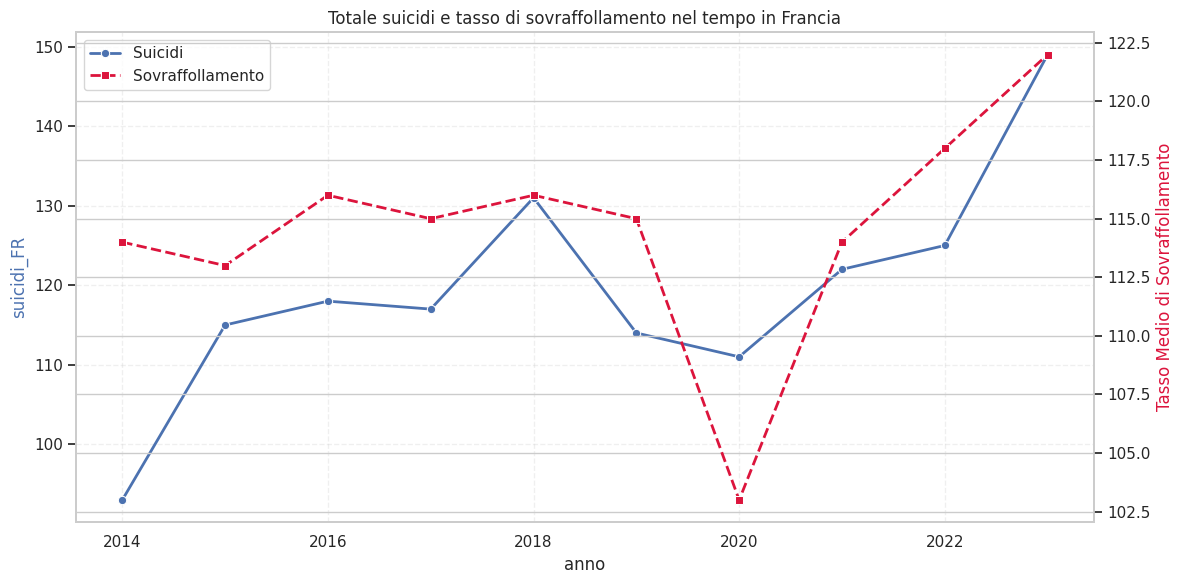

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# =============================================================
# 6. TREND GLOBALE SUICIDI + SOVRAFFOLLAMENTO
# =============================================================
trend = df_UK
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_UK['suicidi_uk'])
print('ADF Statistic Suicidi:', result[0])
print('p-value Suicidi:', result[1])
result = adfuller(df_UK['sovraffollamento_uk'])
print('ADF Statistic Sovraffollamento:', result[0])
print('p-value Sovraffollamento:', result[1])
trend['Δsuicidi'] = df_UK['suicidi_uk'].diff()
trend['sovraffollamento']= df_UK['sovraffollamento_uk']
# 2. Elimina le righe con NaN o inf
df_clean = trend[['Δsuicidi', 'sovraffollamento']].dropna()

result = adfuller(df_clean['Δsuicidi'])
print('ADF Statistic Δsuicidi:', result[0])
print('p-value Δsuicidi:', result[1])

grangercausalitytests(df_clean[['Δsuicidi', 'sovraffollamento']], maxlag=2)

fig, ax1 = plt.subplots(figsize=(12,6))

# linea suicidi (asse sinistro)
h_suicidi = sns.lineplot(
    data=trend, x='anno', y='suicidi_uk',
    marker='o', ax=ax1, lw=2, label='Suicidi'           # ← una sola voce in legenda
).lines[0]

ax1.set_xlabel('anno')
ax1.set_ylabel('suicidi_UK', color=h_suicidi.get_color())
ax1.grid(True, linestyle='--', alpha=0.3)

# linea sovraffollamento (asse destro) – colore diverso
ax2 = ax1.twinx()
h_sovraff = sns.lineplot(
    data=trend, x='anno', y='sovraffollamento_uk',
    marker='s', ax=ax2, lw=2, linestyle='--', color='crimson',
    legend=False                                       # ← nessuna voce duplicata
).lines[0]

ax2.set_ylabel('Tasso Medio di Sovraffollamento', color='crimson')

# legenda “pulita”
ax1.legend([h_suicidi, h_sovraff], ['Suicidi', 'Sovraffollamento'], loc='upper left')

plt.title('Totale suicidi e tasso di sovraffollamento nel tempo nel Regno Unito')
plt.tight_layout()
plt.show()

# =============================================================
# 6. TREND GLOBALE SUICIDI + SOVRAFFOLLAMENTO
# =============================================================
trend = df_FR

fig, ax1 = plt.subplots(figsize=(12,6))

# linea suicidi (asse sinistro)
h_suicidi = sns.lineplot(
    data=trend, x='anno', y='suicidi',
    marker='o', ax=ax1, lw=2, label='Suicidi'           # ← una sola voce in legenda
).lines[0]

ax1.set_xlabel('anno')
ax1.set_ylabel('suicidi_FR', color=h_suicidi.get_color())
ax1.grid(True, linestyle='--', alpha=0.3)

# linea sovraffollamento (asse destro) – colore diverso
ax2 = ax1.twinx()
h_sovraff = sns.lineplot(
    data=trend, x='anno', y='sovraffollamento',
    marker='s', ax=ax2, lw=2, linestyle='--', color='crimson',
    legend=False                                       # ← nessuna voce duplicata
).lines[0]

ax2.set_ylabel('Tasso Medio di Sovraffollamento', color='crimson')

# legenda “pulita”
ax1.legend([h_suicidi, h_sovraff], ['Suicidi', 'Sovraffollamento'], loc='upper left')

plt.title('Totale suicidi e tasso di sovraffollamento nel tempo in Francia')
plt.tight_layout()
plt.show()

<Axes: xlabel='sovraffollamento', ylabel='suicidi'>

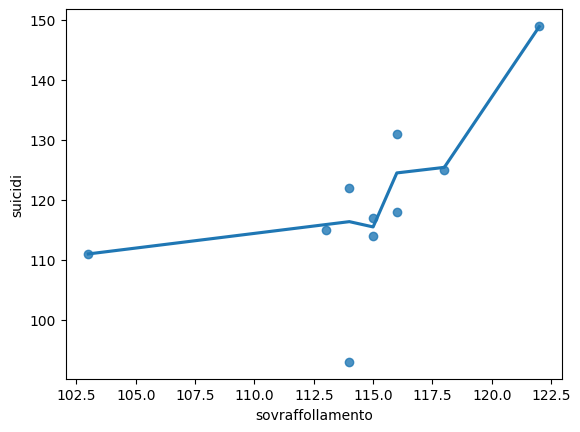

In [ ]:
sns.regplot(data=df_FR, x='sovraffollamento', y='suicidi', lowess=True)

<Axes: xlabel='sovraffollamento_uk', ylabel='suicidi_uk'>

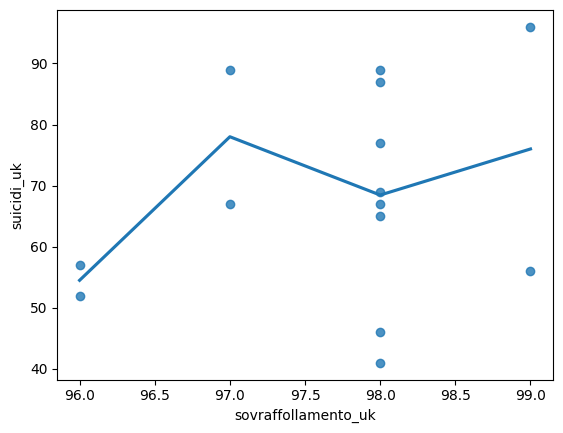

In [ ]:
sns.regplot(data=df_UK, x='sovraffollamento_uk', y='suicidi_uk', lowess=True)